<a href="https://colab.research.google.com/github/bitshoroscope/advent/blob/main/vwo_analysis_inline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [23]:
!cd vwo

/bin/bash: line 0: cd: vwo: No such file or directory


In [31]:
!git push --set-upstream main master

error: src refspec master does not match any.
error: failed to push some refs to 'main'


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl

In [3]:
%load_ext google.colab.data_table

In [4]:
%%bigquery --project papyrus-data-mx df

SELECT p.id,vwo.score_quality, p.sale_price FROM `papyrus-data-mx.habi_mx_producto.vwo_results` vwo
join `papyrus-data-mx.habi_mx_okol.okol_properties` p
on p.id = vwo.id
where p.sale_price is not null and p.sale_price between 450000 and 10000000 
and not REGEXP_CONTAINS(p.description, "remate") and currency = 'MXN';

In [8]:
bin_size = 500000
sns.set_theme(style="whitegrid")

In [9]:
%%bigquery --project papyrus-data-mx df_properties
SELECT p.sale_price FROM `papyrus-data-mx.habi_mx_okol.okol_properties` p
where p.sale_price is not null and p.sale_price between 450000 and 10000000 
and p.purpose = 1 and created > '2022-04-20' and p.status = 1
and not REGEXP_CONTAINS(p.description, "remate") and currency = 'MXN';

Text(0.5, 1.0, 'Active properties')

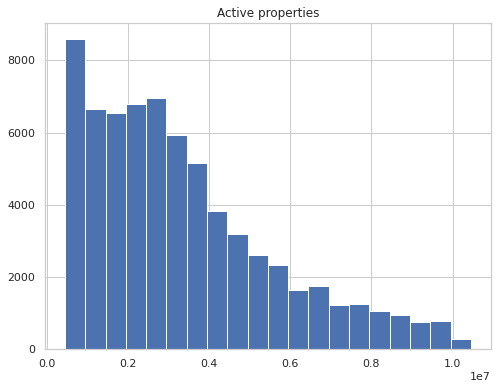

In [10]:
filtered = df_properties.loc[(df_properties['sale_price'] >= 450000) & (df_properties['sale_price'] <= 10000000)]
total = filtered['sale_price']
plt.figure(figsize=(8,6))
plt.hist(total, bins=np.arange(min(total), max(total) + bin_size, bin_size))
plt.title(f'Active properties')

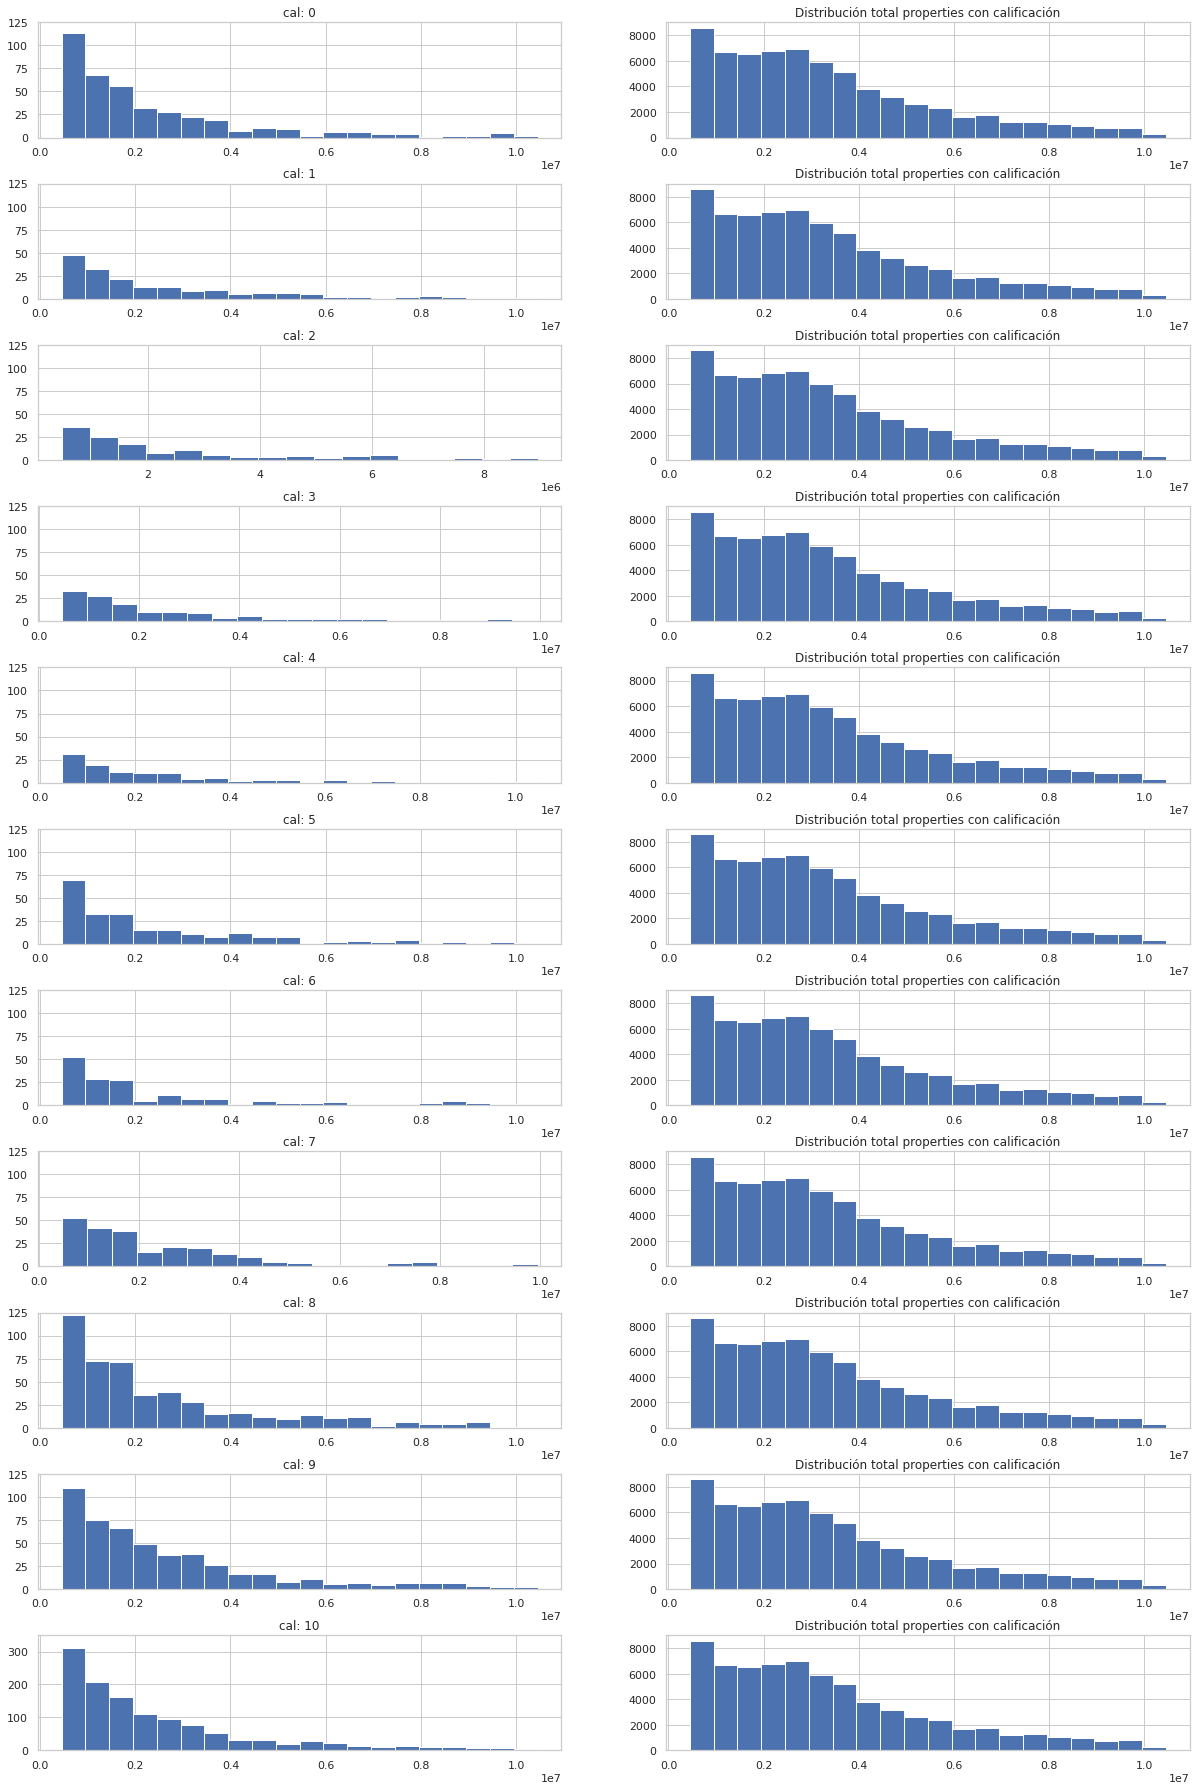

In [18]:
fig, axs = plt.subplots(11, 2, figsize=(20, 30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

for cal in range(11):
  filtered = df.loc[(df['score_quality'] == cal) & (df['sale_price'] >= 450000) & (df['sale_price'] <= 10000000)]
  ten = filtered['sale_price']
  axs[cal,0].set_ylim([0,125])
  if cal == 10:
    axs[cal,0].set_ylim([0,350])
  axs[cal, 0].hist(ten, bins=np.arange(min(ten), max(ten) + bin_size, bin_size), range=[6.5, 12.5])
  axs[cal, 0].title.set_text(f'cal: {cal}')
  axs[cal, 1].hist(total, bins=np.arange(min(total), max(total) + bin_size, bin_size))
  axs[cal, 1].title.set_text(f'Distribución total properties con calificación')


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

for cal in range(11):
  filtered = df.loc[(df['score_quality'] == cal) & (df['sale_price'] >= 450000) & (df['sale_price'] <= 10000000)]
  ten = filtered['sale_price']
  print(f'--- Cal: {cal}---')
  print(filtered['sale_price'].describe())

--- Cal: 0---
count        398.00000
mean     2297618.45729
std      2034741.28245
min       450000.00000
25%       880543.50000
50%      1567236.00000
75%      2950000.00000
max     10000000.00000
Name: sale_price, dtype: float64
--- Cal: 1---
count        178.00000
mean     2437881.15169
std      2027442.25743
min       450000.00000
25%       909249.50000
50%      1725000.00000
75%      3250000.00000
max     10000000.00000
Name: sale_price, dtype: float64
--- Cal: 2---
count       130.00000
mean    2357654.03846
std     2020565.67334
min      462000.00000
25%      890000.00000
50%     1510500.00000
75%     3027500.00000
max     8500000.00000
Name: sale_price, dtype: float64
--- Cal: 3---
count       134.00000
mean    2310852.72388
std     1919561.15104
min      450000.00000
25%      983715.00000
50%     1594500.00000
75%     3000000.00000
max     9800000.00000
Name: sale_price, dtype: float64
--- Cal: 4---
count        105.00000
mean     2236611.17143
std      1921201.26106
min      

Text(0.5, 1.0, 'Distribución total con calificación')

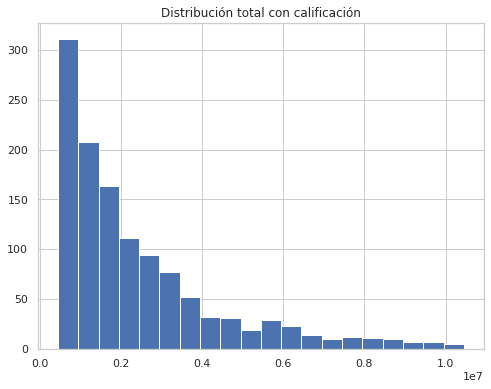

In [ ]:
# Distribución de precios de todos los inmuebles con calificación (sin outliers)
filtered = df.loc[(df['sale_price'] >= 450000) & (df['sale_price'] <= 10000000)]
active = filtered['sale_price']
plt.figure(figsize=(8,6))
plt.hist(ten, bins=np.arange(min(active), max(active) + bin_size, bin_size))
plt.title(f'Distribución total con calificación')

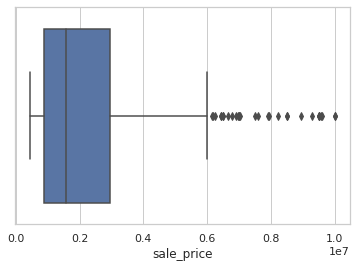

In [ ]:
filtered_zero = df.loc[(df['score_quality'] == 0)]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=filtered_zero["sale_price"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


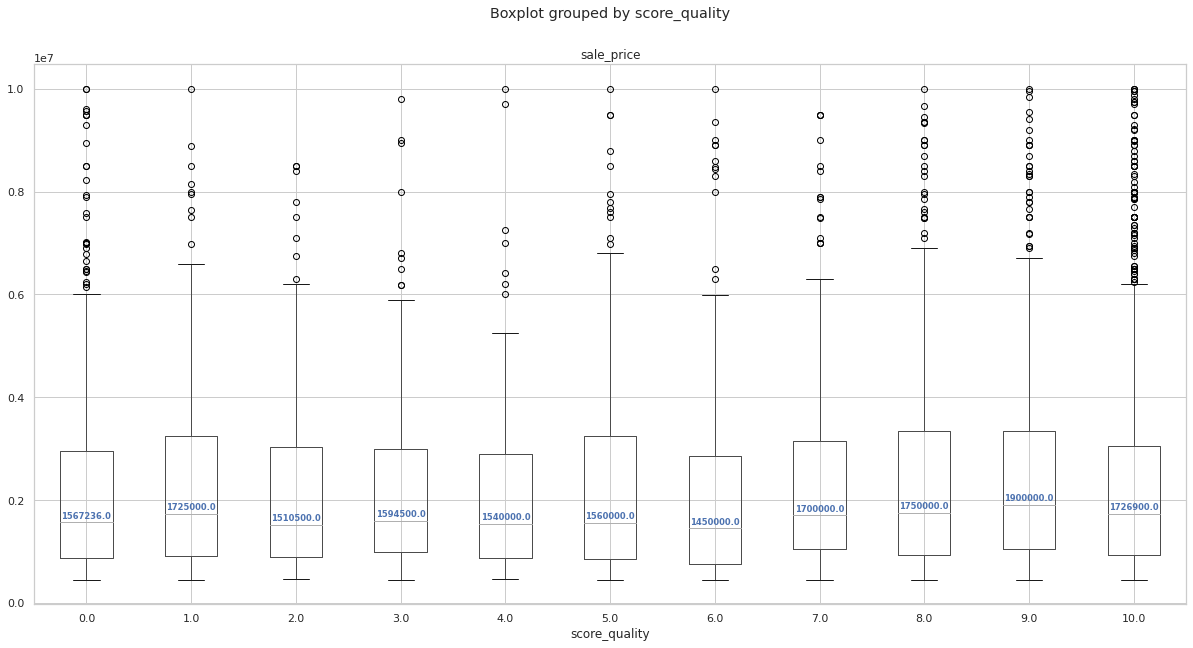

In [20]:
sns.set_style("whitegrid")
box_plot = df.boxplot(column=["sale_price"],by="score_quality", figsize=(20,10))
medians = df.groupby(['score_quality'])['sale_price'].median()
vertical_offset = df['sale_price'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick-1] + vertical_offset,medians[xtick-1], 
            horizontalalignment='center',size='x-small',color='b',weight='semibold')

In [ ]:
df.describe()

,id,score_quality,sale_price
count,4524.00000,4523.00000,4524.00000
mean,18589013.83643,6.70683,14789819.32383
std,7801490.72884,3.56507,539859122.10103
min,104317.00000,0.00000,250.00000
25%,13749743.25000,4.00000,795408.00000
50%,23028553.50000,8.00000,1650000.00000
75%,24595983.25000,10.00000,3500001.25000
max,24887647.00000,10.00000,35000000000.00000
